In [3]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

In [91]:
def read_netcdf(filename):
    try:
         # Open the NetCDF file
        dataset = nc.Dataset(filename, 'r')

        # Read the positions variable
        positions = dataset.variables['positions'][:]

        # Get the dimensions
        object, xyz, iter = positions.shape
        print(f"Read {object} objects with {xyz} coordinates and {iter} iterations")

        return positions
    except Exception as e:
        print(f"An error occurred: {e}")

def plot_positions(positions):
    # Get the dimensions
    print(positions.shape)
    xyz, object, iter = positions.shape

    # Create a figure
    fig = plt.figure()
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the positions
    for i in range(object):
        print(f"Plotting object {i}")
        x = positions[0, i, :]
        y = positions[1, i, :]
        z = positions[2, i, :]
        ax.plot(x, y, z, label=f'Object {i}', marker='o', markersize=1)

    # Plot the last position of each object
    for i in range(object):
        x = positions[0, i, -1]
        y = positions[1, i, -1]
        z = positions[2, i, -1]
        ax.plot(x, y, z,  marker='o', markersize=5, color='red')

    # Set the labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_title('Object positions')
    ax.legend()

    # Show the plot
    plt.show()


Read 3 objects with 1 coordinates and 10 iterations
(3, 1, 10)
Plotting object 0
Plotting object 1


IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 640x480 with 0 Axes>

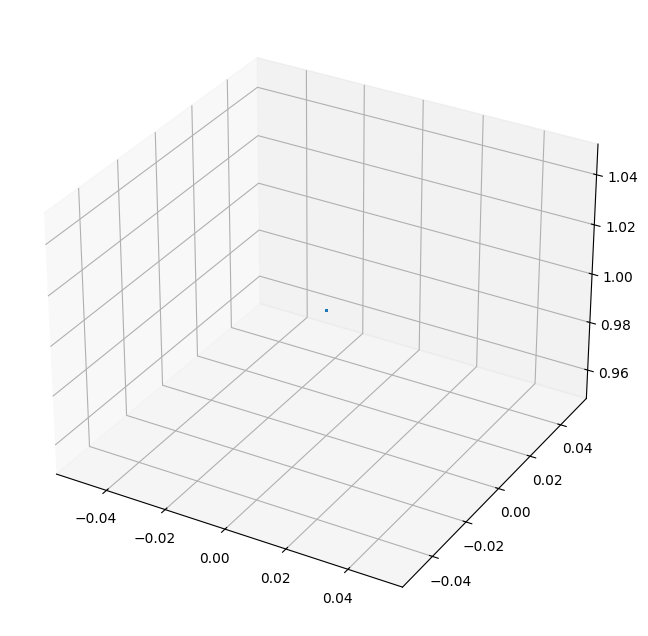

In [92]:
#execute fotran
#!/home/fillies/Documents/Uni_Projects/3_Body_system/shell_scripts/main.sh

# Example usage
filename = '/home/fillies/Documents/Uni_Projects/3_Body_system/data/pos.nc'
positions = read_netcdf(filename)

#print(positions)
#print(positions.shape)

if positions is not None:
    plot_positions(positions)